# Atividade 01 - Inventário de emissões utilizando Python
## Empresa: Tupy (joinville)
Alunos: Guilherme Audi e Giovanna Martins Utilizamos o capítulo 12.13 da AP42, Pois nosso empreendimento é uma fundidora de Metal. 
Link: https://www.epa.gov/sites/default/files/2020-11/documents/c12s13.pdf

## Etapa 1- Planilha dos fatores de emissão 

In [74]:
import pandas as pd
import os

# Caminho da pasta
folder_path = r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\tabelas\FE' 

# Listar arquivos na pasta
files = os.listdir(folder_path)

# #arquivo não estava sendo encontrado. Precisei verificar se realemente estava na pasta.
print(files)
import pandas as pd

# Caminho do arquivo CSV
file_path = r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\tabelas\FE\chpt_12_13.csv'

# Abrir o arquivo CSV usando o Pandas com o encoding correto
fe = pd.read_csv(file_path, encoding='latin1')

# plotando a tabela 
print(fe)


['chpt_12_13.csv']
                                 FONTE   part    NO  (PM-10) 
0                        Arco eletrico   13.0  0.02      0.00
1                     Forno de fundicao  11.0  0.01      0.00
2  Benficiamento  de areia para moldes    NaN   NaN      5.40
3                      Inducao eletrica   0.1   NaN      0.08
4                    Fornos principais    NaN   NaN      2.00
5                    despejo e fundicao   NaN   NaN      2.52
6                   limpeza da fundicao   NaN   NaN      1.53
7            resfriamento da fundicao     NaN   NaN      1.26


Foram tabelados os valores disponíveis na AP-42. A unidade das colunas "Part(Particulas) e NO (Oxido nítrico) é dada em lb poluente por tonelada de metal produzido. Já, os valores disnponíveis de "PM-10" para "fornos principais" e "desepejo e fundição" foram dados em lb de poluente/ kg de areia, portanto foram multiplicados por 0,9, uma vez que a relação de areia utilizada para moldes no processo de fundição varia de 0,8/1 partes de areia para 1 de ferro fundido. Fonte: https://cetesb.sp.gov.br/consumosustentavel/wp-content/uploads/sites/20/2015/01/caso01.pdf

## Etapa 2- Função da taxa de emissão 

Index(['FONTE ', 'part', 'NO', '(PM-10) '], dtype='object')
56255.34246575343


C:\Users\guilh\AppData\Local\Temp\ipykernel_4724\910610231.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[ii-1].set_xticklabels(fe['FONTE '], rotation=45, fontsize=8)  # Rotaciona os rótulos do eixo X
C:\Users\guilh\AppData\Local\Temp\ipykernel_4724\910610231.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[ii-1].set_xticklabels(fe['FONTE '], rotation=45, fontsize=8)  # Rotaciona os rótulos do eixo X
C:\Users\guilh\AppData\Local\Temp\ipykernel_4724\910610231.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[ii-1].set_xticklabels(fe['FONTE '], rotation=45, fontsize=8)  # Rotaciona os rótulos do eixo X


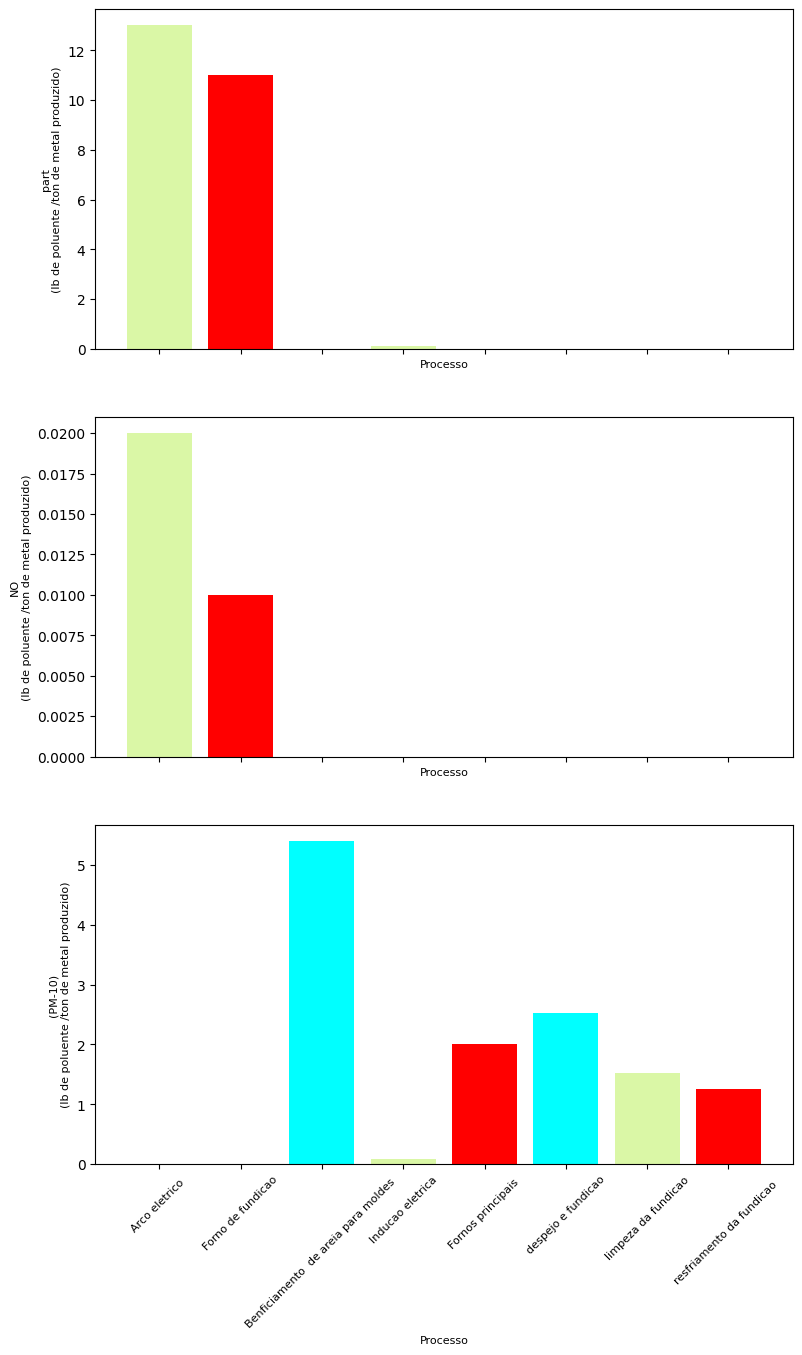

In [75]:
print(fe.columns)
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = (852000/365)  # taxa de atividade em lb/ano 
emis = fe['part']*atv

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig, ax = plt.subplots(len(fe.columns)-1, 1, sharex=True, figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    ax[ii-1].bar(fe['FONTE '], fe.iloc[:, ii], color=['#DAF7A6', 'red', 'cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(lb de poluente /ton de metal produzido)', fontsize=8) 
    ax[ii-1].set_xticklabels(fe['FONTE '], rotation=45, fontsize=8)  # Rotaciona os rótulos do eixo X

# Salva a figura na pasta figures 
fig.savefig(r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\figures')

## Etapa 3.1 - taxa de emissão com variável aleatória

2334.246575342466
1050.4109589041095


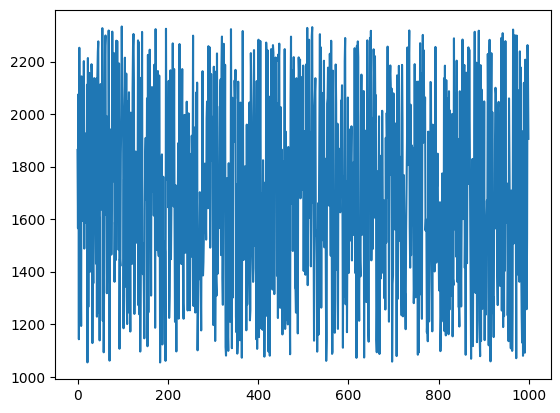

In [76]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = (852000/365)   #ton/dia, considerando a capacidade máxima da empresa. 
atvMin = (852000*0.45/365)
n = 1000 #seguindo o valor estipulado pelo professor
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
print(atvMax)
print(atvMin)
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

## Etapa 3.2 - taxa de emissão com variável sazonal

In [84]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2023, 1, 1)
data_final = datetime(2023, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2023-01-01 00:00:00
2023-01-02 00:00:00
2023-01-03 00:00:00
2023-01-04 00:00:00
2023-01-05 00:00:00
2023-01-06 00:00:00
2023-01-07 00:00:00
2023-01-08 00:00:00
2023-01-09 00:00:00
2023-01-10 00:00:00
2023-01-11 00:00:00
2023-01-12 00:00:00
2023-01-13 00:00:00
2023-01-14 00:00:00
2023-01-15 00:00:00
2023-01-16 00:00:00
2023-01-17 00:00:00
2023-01-18 00:00:00
2023-01-19 00:00:00
2023-01-20 00:00:00
2023-01-21 00:00:00
2023-01-22 00:00:00
2023-01-23 00:00:00
2023-01-24 00:00:00
2023-01-25 00:00:00
2023-01-26 00:00:00
2023-01-27 00:00:00
2023-01-28 00:00:00
2023-01-29 00:00:00
2023-01-30 00:00:00
2023-01-31 00:00:00
2023-02-01 00:00:00
2023-02-02 00:00:00
2023-02-03 00:00:00
2023-02-04 00:00:00
2023-02-05 00:00:00
2023-02-06 00:00:00
2023-02-07 00:00:00
2023-02-08 00:00:00
2023-02-09 00:00:00
2023-02-10 00:00:00
2023-02-11 00:00:00
2023-02-12 00:00:00
2023-02-13 00:00:00
2023-02-14 00:00:00
2023-02-15 00:00:00
2023-02-16 00:00:00
2023-02-17 00:00:00
2023-02-18 00:00:00
2023-02-19 00:00:00


In [78]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

          Data  Mes
0   2023-01-01    1
1   2023-01-02    1
2   2023-01-03    1
3   2023-01-04    1
4   2023-01-05    1
..         ...  ...
360 2023-12-27   12
361 2023-12-28   12
362 2023-12-29   12
363 2023-12-30   12
364 2023-12-31   12

[365 rows x 2 columns]


In [103]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\tabelas\FE.csv')


# Criando uma figura com os valores aleatórios
#fig, ax= plt.subplots()
#ax.plot(datas, atv)

    Mes  sazonalidade  atividade
0     1      1.866025  88.624033
1     2      1.500000  67.926424
2     3      1.000000  74.198638
3     4      0.500000  92.614089
4     5      0.133975  72.595439
5     6      0.000000  94.033448
6     7      0.133975  53.586862
7     8      0.500000  56.723019
8     9      1.000000  88.106325
9    10      1.500000  88.374219
10   11      1.866025  76.730098
11   12      2.000000  99.249351


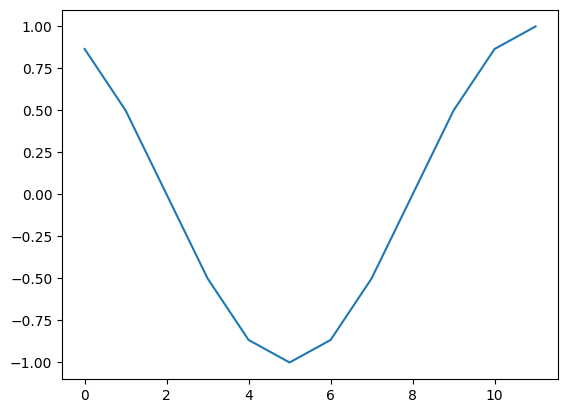

In [104]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Mes']/12)
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv(r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\tabelas\FE.csv')

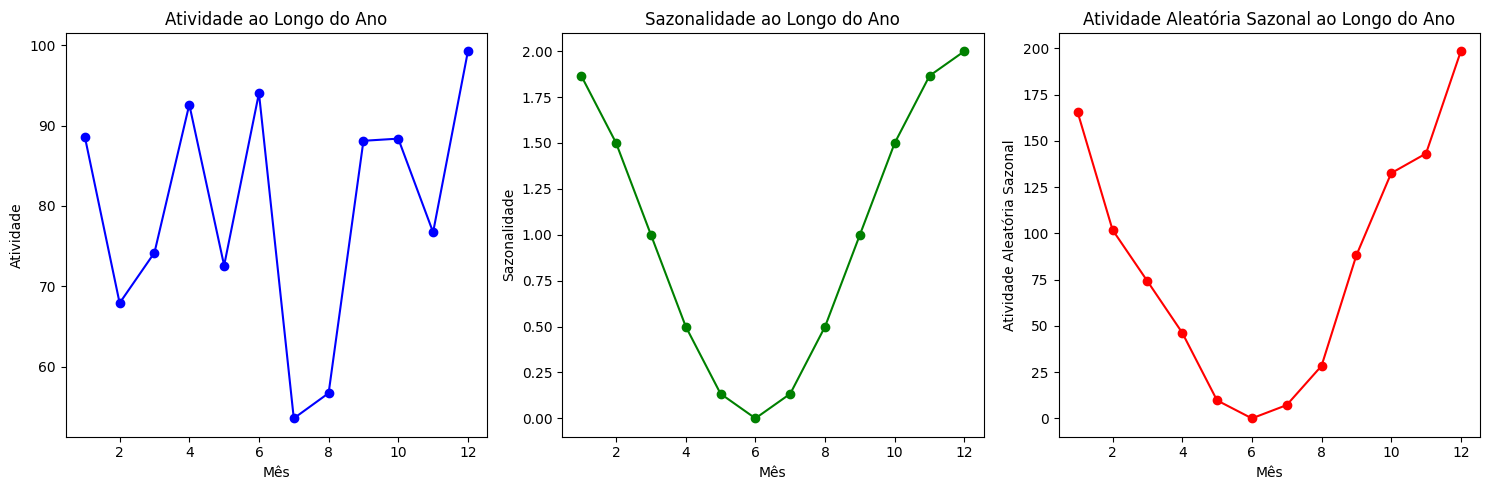

In [106]:
# Valores aleatórios com sazonalidade
plt.figure(figsize=(15, 5))

# Gráfico 1: atividade ao longo do ano
plt.subplot(1, 3, 1)
plt.plot(df['Mes'], df['atividade'], marker='o', color='b')
plt.xlabel('Mês')
plt.ylabel('Atividade')
plt.title('Atividade ao Longo do Ano')

# Gráfico 2: sazonalidade ao longo do ano
plt.subplot(1, 3, 2)
plt.plot(df['Mes'], df['sazonalidade'], marker='o', color='g')
plt.xlabel('Mês')
plt.ylabel('Sazonalidade')
plt.title('Sazonalidade ao Longo do Ano')
df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 
# Gráfico 3: atividade aleatória sazonal ao longo do ano
plt.subplot(1, 3, 3)
plt.plot(df['Mes'], df['aleatorioSazonal'], marker='o', color='r')
plt.xlabel('Mês')
plt.ylabel('Atividade Aleatória Sazonal')
plt.title('Atividade Aleatória Sazonal ao Longo do Ano')

plt.tight_layout()
plt.show()